# Group proposal

### Introduction 

- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question


Predictive question: 
- Given measurements of ______ , Does the paitent has heart diease (i.e presence or absence o heart diease)? 

## Preliminary exploratory data analysis:
- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

### Loading libaray needed:
- to read data via url
- to clean and wrangle data
- to summarize and train data.

In [56]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
options(repr.matrix.max.rows = 6) 
library(dplyr)

### Load the data set

In [63]:
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", destfile = "data/cleveland.csv")
heart_disease_data <- read_csv("data/cleveland.csv", col_names = FALSE) 
heart_disease_data             

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


### Clean the date set 
- adding columns name
- change sex from (1,0) to male vs female
- change the Range of num from (0-4) to (0-1). 

Noted that every varible has its own column and each row is a single observation, each value is in the single cell. Therefore the date itself is a tidy data. 

In [64]:
heart_disease_data <- read_csv("data/cleveland.csv", col_names = FALSE) |>
                       rename( age = X1,
                               sex = X2,
                               cp = X3,
                               trestbps = X4,
                               chol = X5,
                               fbs = X6,
                               restecg = X7,
                              thalach = X8,
                              exang =  X9, 
                             oldpeak =  X10,
                             slope =  X11, 
                             ca = X12,
                             thal= X13,
                              num = X14)

heart_disease_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [65]:
heart_disease_data <- mutate(heart_disease_data, new_num = case_when(num == 0 ~ 0, num == 1| num == 2 | num == 3| num == 4 ~ 1))
heart_disease_data <- mutate(heart_disease_data, sex = case_when(sex == 0 ~ "male",sex == 1 ~ "female"))
heart_disease_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,new_num
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
63,female,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
67,female,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
67,female,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,female,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,1
57,male,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,1
38,female,3,138,175,0,0,173,0,0.0,1,?,3.0,0,0


### Split Data into traning Set and testing set.

In [66]:
hd_split <- initial_split(heart_disease_data, prop = 0.75, strata = new_num)  
hd_train <- training(hd_split)   
hd_test <- testing(hd_split)

hd_train

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,new_num
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
63,female,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
37,female,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
41,male,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,female,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,1
57,female,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,1
57,male,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,1


## summarize the data
- a table shows the number of observation
- a table gives the summary of all quantative varible in the data set.
- a table gives the number of rows have missing data

In [67]:
num_of_observation <- nrow(hd_train)
num_of_observation

[1] 227

In [74]:
sumOfData <- hd_train |> 
             select(-sex,-cp,-slope,-ca,-num,-new_num,-thal,-fbs) |>
             summary()
sumOfData

      age           trestbps          chol          restecg     thalach     
 Min.   :34.00   Min.   : 94.0   Min.   :126.0   Min.   :0   Min.   : 71.0  
 1st Qu.:48.50   1st Qu.:120.0   1st Qu.:211.0   1st Qu.:0   1st Qu.:132.0  
 Median :56.00   Median :130.0   Median :242.0   Median :1   Median :152.0  
 Mean   :54.92   Mean   :132.9   Mean   :247.4   Mean   :1   Mean   :148.3  
 3rd Qu.:61.00   3rd Qu.:140.0   3rd Qu.:274.0   3rd Qu.:2   3rd Qu.:163.0  
 Max.   :77.00   Max.   :200.0   Max.   :564.0   Max.   :2   Max.   :194.0  
     exang           oldpeak     
 Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:0.000  
 Median :0.0000   Median :0.800  
 Mean   :0.3524   Mean   :1.076  
 3rd Qu.:1.0000   3rd Qu.:1.800  
 Max.   :1.0000   Max.   :6.200  

In [75]:
is.na(hd_train)
(num_of_missing_columns <- sum(is.na(hd_train)))
## Noted that there is no missing value so there is no rows with missing value

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,new_num
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


[1] 0

### Visualizing Data

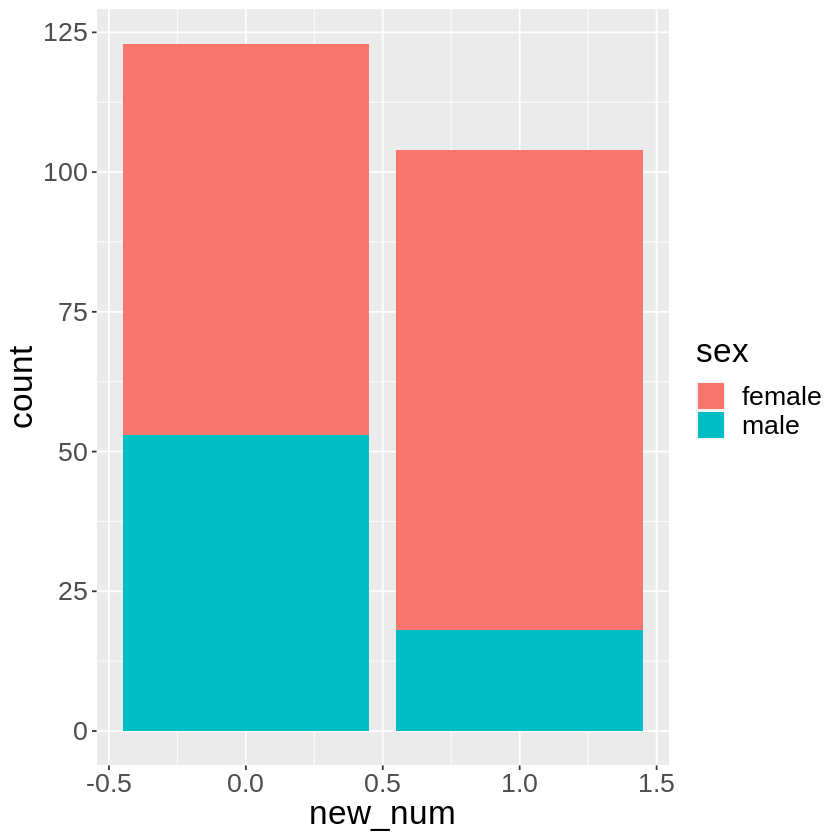

In [76]:
distofnum <- hd_train |>
ggplot(aes(x = new_num, fill = sex)) +
geom_bar() +
theme(text = element_text(size = 20))
distofnum

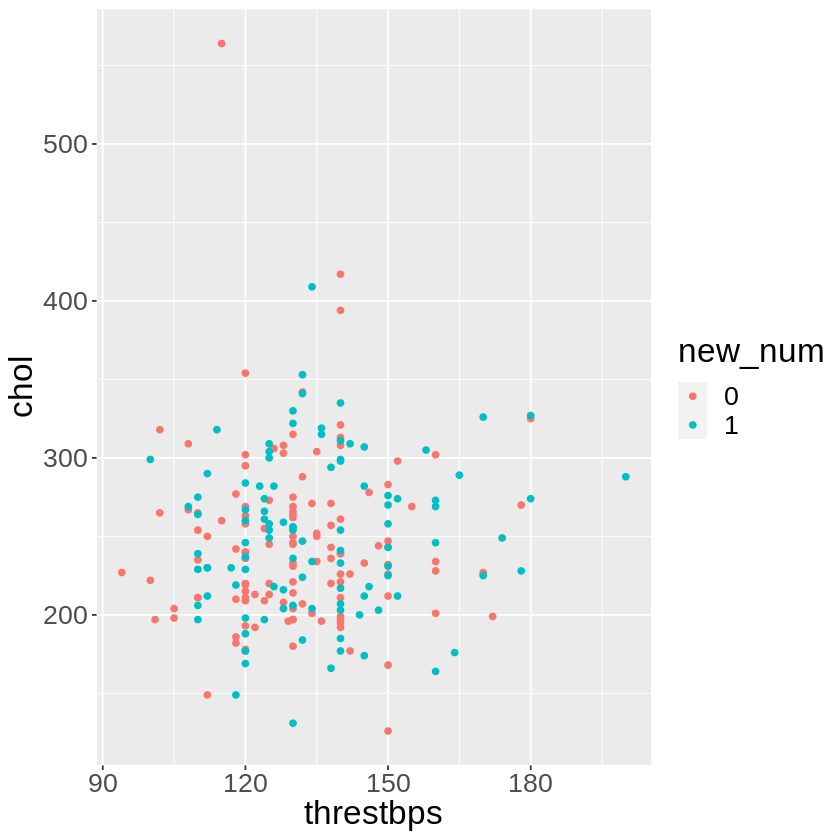

In [77]:
trestbpsVSchol <- hd_train |>
ggplot(aes(x = trestbps, y = chol,  color = as_factor(new_num))) +
geom_point() +
labs(x = "threstbps", color = "new_num") +
theme(text = element_text(size = 20))
trestbpsVSchol

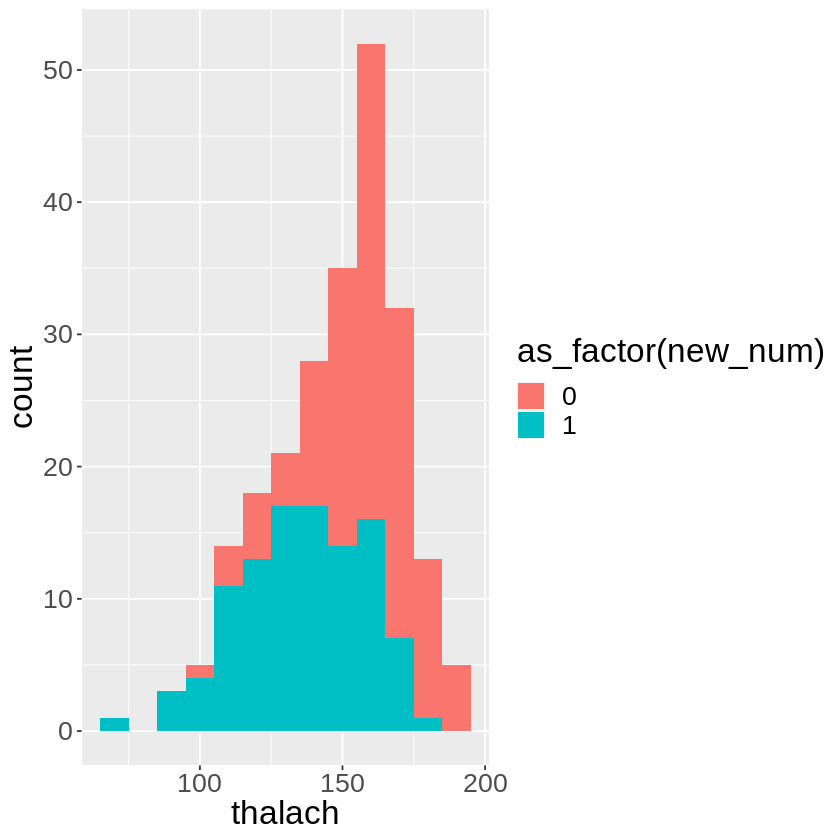

In [78]:
thalachVSold_peak <-  hd_train |>
ggplot(aes(x = thalach, fill = as_factor(new_num))) +
geom_histogram(binwidth = 10) +
labs(x = "thalach") +
theme(text = element_text(size = 20))
thalachVSold_peak

### Methods:
- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
- Describe at least one way that you will visualize the results


### Expected outcomes and significance:
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?